# TikZ plotting stuff

In [1]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

## SIR ODE

### Vanilla model

The vanilla Susceptible, Infected, and Recovered (SIR) model is described diagrammatically by:

![](https://www.mdpi.com/symmetry/symmetry-14-02583/article_deploy/html/images/symmetry-14-02583-g001-550.jpg)

And in equation form,

$$
\begin{align*}
\frac{dS}{dt} &= -\frac{\beta S I}{N} \\
\frac{dI}{dt} &= \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align*}
$$

Where:
- $\beta$ is the mixing rate
- $1/\gamma$ is the average infectious period

In [20]:
S_0, I_0, R_0 = 499, 1, 0
N             = S_0 + I_0 + R_0
beta, gamma   = 0.3, (1/14)
t_max         = 125

t = np.linspace(0, t_max, t_max+1) # from t=0..t_max, with (t_max+1) points sampled

In [21]:
def sir_rates(X, t):
    S, I, R = X
    dS = -beta * S * I / N
    dI = -dS - gamma * I
    dR = gamma * I
    
    return np.array([dS, dI, dR])

In [22]:
res = integrate.odeint(sir_rates, 
                       (S_0, I_0, R_0),
                       t)
S, I, R = res.T

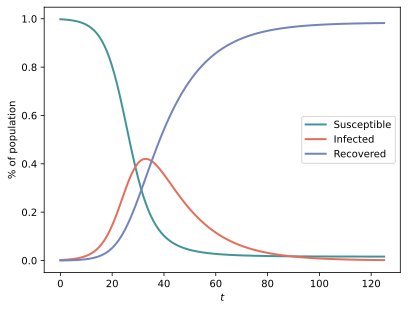

In [23]:
plt.plot(t, S/N, color='#41949A', label="Susceptible", linewidth=2)
plt.plot(t, I/N, color='#E56E5A', label="Infected", linewidth=2)
plt.plot(t, R/N, color='#7384BB', label="Recovered", linewidth=2)

plt.xlabel(r"$t$")
plt.ylabel("% of population")

plt.legend()
plt.show()

In [34]:
for x in [(t_v, s_v) for s_v, t_v in zip(R/N, t)]: print(x)

(0.0, 0.0)
(1.0, 0.00016044669257483907)
(2.0, 0.00036193331492854905)
(3.0, 0.0006148926948404921)
(4.0, 0.0009323726629151103)
(5.0, 0.001330670145106066)
(6.0, 0.001830106931127467)
(7.0, 0.002455971403026405)
(8.0, 0.0032396510506710074)
(9.0, 0.004219977159296082)
(10.0, 0.005444794722681841)
(11.0, 0.006972754098230427)
(12.0, 0.00887529193874307)
(13.0, 0.011238722179614701)
(14.0, 0.014166289088609818)
(15.0, 0.017779937716678768)
(16.0, 0.022221435476182713)
(17.0, 0.027652338625945735)
(18.0, 0.034252170024485565)
(19.0, 0.0422141043197727)
(20.0, 0.05173752213068529)
(21.0, 0.06301707619796504)
(22.0, 0.07622847321159593)
(23.0, 0.09151199135918818)
(24.0, 0.10895567233382564)
(25.0, 0.12858084047405985)
(26.0, 0.1503327590283119)
(27.0, 0.17407859888463387)
(28.0, 0.1996135302193346)
(29.0, 0.22667406043112157)
(30.0, 0.2549563063556628)
(31.0, 0.2841361668985982)
(32.0, 0.31388848531827834)
(33.0, 0.34390305691208545)
(34.0, 0.3738963670376853)
(35.0, 0.40361889847719784)


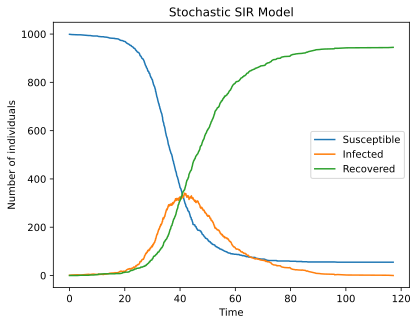

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate
N = 1000  # Total population
I0 = 1  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals
S0 = N - I0 - R0  # Initial number of susceptible individuals
t_max = 200  # Maximum time
num_simulations = 1  # Number of simulations

# Stochastic SIR model simulation using Gillespie algorithm
def stochastic_SIR(S0, I0, R0, beta, gamma, t_max):
    t = 0
    S, I, R = S0, I0, R0
    time_points = [t]
    susceptible = [S]
    infected = [I]
    recovered = [R]

    while t < t_max and I > 0:
        rates = [beta * S * I / N, gamma * I]
        total_rate = sum(rates)
        dt = np.random.exponential(1 / total_rate)
        t += dt

        # Determine which event happens
        rand = np.random.rand()
        if rand < rates[0] / total_rate:
            S -= 1
            I += 1
        else:
            I -= 1
            R += 1

        time_points.append(t)
        susceptible.append(S)
        infected.append(I)
        recovered.append(R)

    return time_points, susceptible, infected, recovered

# Perform simulation
time_points, susceptible, infected, recovered = stochastic_SIR(S0, I0, R0, beta, gamma, t_max)

# Plot the results
plt.plot(time_points, susceptible, label='Susceptible')
plt.plot(time_points, infected, label='Infected')
plt.plot(time_points, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('Stochastic SIR Model')
plt.legend()
plt.show()

In [109]:
def trans_arr(arr, ts, x_loc, y_loc, step=1):
    arr, ts = np.array(arr), np.array(ts)
    
    (x0, x1) = x_loc
    (y0, y1) = y_loc
    
    arr = arr[::step]
    ts  =  ts[::step]
    
    new_ts = x0 + (ts/ts.max())*(x1-x0)
    new_ar = y0 + (arr/N)*(y1-y0)
    
    for x in [(t_v, s_v) for t_v, s_v in zip(new_ts, new_ar)]: print(x)

In [111]:
xs = (0, 3)
ys = (0, 2.5)
step = 50

for arr, col in zip([susceptible, infected, recovered], ("s", "i", "r")):
    print(f"\draw[curve,{col}-color] plot[smooth] coordinates"+" {")
    trans_arr(arr, time_points, xs, ys, step)
    print("};")
    print()

\draw[curve,s-color] plot[smooth] coordinates {
(0.0, 2.4975)
(0.7769224580476183, 2.4074999999999998)
(0.9151830033560209, 2.3225000000000002)
(1.0157448342269257, 2.2175000000000002)
(1.0625816427813568, 2.12)
(1.1188737287533042, 2.0349999999999997)
(1.1581606372260431, 1.9500000000000002)
(1.189378079326103, 1.8475)
(1.222807075325406, 1.755)
(1.2569223066062116, 1.6625)
(1.2797095380064987, 1.58)
(1.3053108166472853, 1.4874999999999998)
(1.332780846083954, 1.4025)
(1.3571840462399587, 1.3225)
(1.3837709932555988, 1.2575)
(1.408285600613946, 1.185)
(1.4349728340276133, 1.1125)
(1.4561344765981965, 1.0374999999999999)
(1.4802632437865402, 0.9825)
(1.5066308514090934, 0.9075)
(1.5333012451515713, 0.8450000000000001)
(1.5641438148948787, 0.7625)
(1.5882949369447128, 0.71)
(1.6229863998065541, 0.6625000000000001)
(1.6554122260915154, 0.59)
(1.677103880070836, 0.5375)
(1.7273863740421156, 0.49)
(1.780367768266824, 0.45999999999999996)
(1.8265530072989182, 0.41000000000000003)
(1.8736975

In [169]:
# \(\i=1 \AND \j=2\) \OR \(\i=3 \AND \j=4\)}{
#                 \fill[s-color] (\i+0.1,\j+0.1) rectangle (\i+0.95,\j+0.95);
#             }{}

def color_cells(cells: [(int,int)], color: str):
    print(f"\ifthenelse{{" + " \\OR ".join([f"\\(\\i={i} \\AND \\j={j}\\)" for (i,j) in cells]) + f"}}{{\n\\fill[{color}] (\\i+0.1,\\j+0.1) rectangle (\\i+0.95,\\j+0.95);\n}}{{}}")

In [173]:
choices = np.array([(i,j) for i in range(0,6) for j in range(0,6)])

In [174]:
s = np.random.binomial(1, 18/36, size=36).astype(bool)
i = ~s

In [175]:
color_cells(choices[s], "s-color")

\ifthenelse{\(\i=0 \AND \j=0\) \OR \(\i=0 \AND \j=2\) \OR \(\i=0 \AND \j=3\) \OR \(\i=0 \AND \j=4\) \OR \(\i=1 \AND \j=0\) \OR \(\i=1 \AND \j=1\) \OR \(\i=1 \AND \j=2\) \OR \(\i=2 \AND \j=0\) \OR \(\i=2 \AND \j=1\) \OR \(\i=2 \AND \j=2\) \OR \(\i=2 \AND \j=4\) \OR \(\i=3 \AND \j=1\) \OR \(\i=3 \AND \j=3\) \OR \(\i=3 \AND \j=4\) \OR \(\i=4 \AND \j=0\) \OR \(\i=4 \AND \j=4\) \OR \(\i=4 \AND \j=5\) \OR \(\i=5 \AND \j=0\) \OR \(\i=5 \AND \j=3\) \OR \(\i=5 \AND \j=4\)}{
\fill[s-color] (\i+0.1,\j+0.1) rectangle (\i+0.95,\j+0.95);
}{}


In [184]:
i_inds = np.random.choice(np.array(list(range(len(choices))))[i], size=4, replace=False)
i_choices = choices[i_inds]

In [186]:
color_cells(i_choices, "i-color")

\ifthenelse{\(\i=3 \AND \j=0\) \OR \(\i=4 \AND \j=3\) \OR \(\i=4 \AND \j=2\) \OR \(\i=2 \AND \j=5\)}{
\fill[i-color] (\i+0.1,\j+0.1) rectangle (\i+0.95,\j+0.95);
}{}


In [202]:
(~s) & (i)

array([False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True,  True, False, False,  True])

In [204]:
r_inds = np.random.choice(np.array(list(range(len(choices))))[~s & i], size=3, replace=False)
r_choices = choices[r_inds]
color_cells(r_choices, "r-color")

\ifthenelse{\(\i=1 \AND \j=5\) \OR \(\i=5 \AND \j=5\) \OR \(\i=4 \AND \j=1\)}{
\fill[r-color] (\i+0.1,\j+0.1) rectangle (\i+0.95,\j+0.95);
}{}


In [186]:
color_cells(i_choices, "i-color")

\ifthenelse{\(\i=3 \AND \j=0\) \OR \(\i=4 \AND \j=3\) \OR \(\i=4 \AND \j=2\) \OR \(\i=2 \AND \j=5\)}{
\fill[i-color] (\i+0.1,\j+0.1) rectangle (\i+0.95,\j+0.95);
}{}


In [146]:
s = choices[np.random.choice(range(0,len(choices)), size=18, replace=False)]

array([[4, 1],
       [5, 5],
       [1, 4],
       [1, 5],
       [4, 3],
       [1, 3],
       [3, 4],
       [5, 0],
       [1, 1],
       [4, 0],
       [1, 2],
       [3, 2],
       [4, 2],
       [2, 1],
       [2, 4],
       [2, 0],
       [3, 0],
       [5, 2]])

---

In [44]:
def r0(nu_v, mu_v, sigma_v, sigma_h, n_hat, n, beta_hv, init_infect, nu_h, mu_h, beta_vh, p):
    r_hv = (nu_v/(nu_v+mu_v) * sigma_v/mu_v * sigma_h*n_hat/(sigma_h*n_hat + sigma_v*n) * beta_hv)*(1-init_infect)
    r_vh = (nu_h/(nu_h+mu_h) * sigma_h/mu_h * sigma_v*n/(sigma_v*n + sigma_h*n_hat) * beta_vh)*p
    return r_hv*r_vh

In [45]:
def r0(nu_v, mu_v, sigma_v, sigma_h, n_hat, n, beta_hv, init_infect, nu_h, mu_h, beta_vh, p):
    r_hv = (nu_v/(nu_v+mu_v) * sigma_v/mu_v * sigma_h*n_hat/(sigma_h*n_hat + sigma_v*n) * beta_hv)*(1-init_infect)
    r_vh = (nu_h/(nu_h+mu_h) * sigma_h/mu_h * sigma_v*n/(sigma_v*n + sigma_h*n_hat) * beta_vh)*p
    return np.sqrt(r_hv*r_vh)

Target here should be $R_0\approx 1.7$

In [46]:
num_agents = 1500  # number of agents
n = 1000           # number of initial mosquitoes
p = 1.0            # proportion of infected to total vectors
init_infect = .005 # number of hosts initially infected

r0(nu_v=.1,
   mu_v=1/14,
   sigma_v=.5,
   sigma_h=19,
   n_hat=num_agents/3,
   n=n,
   beta_hv=.33,
   beta_vh=.33,
   init_infect=init_infect,
   nu_h=1/5,
   mu_h=1/6,
   p=p)

1.1431715570070837

In [47]:
import seaborn as sns

In [48]:
import scipy

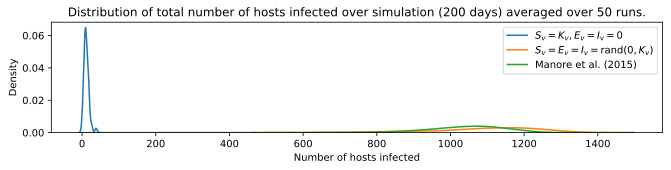

In [72]:
t1 = [18, 7, 15, 17, 19, 1, 11, 17, 7, 10, 3, 9, 9, 16, 11, 6, 2, 9, 13, 11, 4, 9, 24, 9, 7, 16, 11, 15, 5, 7, 10, 4, 16, 38, 9, 17, 13, 11, 26, 8, 18, 8, 8, 9, 14, 7, 17, 12, 4, 13]
t2 = [909, 1196, 1209, 806, 1069, 858, 1055, 1045, 1051, 1133, 1087, 1108, 1199, 1145, 1005, 1301, 1272, 1202, 1147, 810, 1088, 1244, 1164, 1058, 1035, 1157, 1087, 1158, 1179, 916, 1241, 906, 1148, 1204, 1073, 1129, 1210, 1010, 1195, 658, 1212, 764, 1189, 1080, 945, 1046, 1242, 1272, 1224, 1154]

plt.figure(figsize=(11,2))

sns.kdeplot(t1, label=r"$S_v=K_v,E_v=I_v=0$")
sns.kdeplot(t2, label=r"$S_v=E_v=I_v=\text{rand}(0,K_v)$")

t = np.arange(0, 1500.25, .25)
plt.plot(t, scipy.stats.skewnorm.pdf(t, a=-2, loc=1150, scale=150), label="Manore et al. (2015)")
plt.legend()

plt.title("Distribution of total number of hosts infected over simulation (200 days) averaged over 50 runs.")
plt.xlabel("Number of hosts infected")

plt.show()